# Housing Prices: Ames, Iowa

### The Problem

I have been given access to set of data describing the Ames, Iowa real estate sales details from 2006-2010.  The task is to create a model for a real estate firm based upon a set of housing features that accurately predicts sales price.

The goal is to refine the data to a point where the predictive qualities of the model based upon it are as accurate as the data will allow.  

Additional tasks are to provide an analysis of neighborhoods, in regards to where the most sales are taking place and where the most expensive houses are located.

### Acquire the Data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pickle

plt.style.use('seaborn-colorblind')
%matplotlib inline

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dftrain=pd.read_csv("/Users/jtkade/DSI-NYC-4/projects/project-3-house-prices/train.csv")

In [3]:
dftrain.shape

(1460, 81)

In [4]:
dftrain.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

The real estate firm has asked me to refine the total amount of features included in the model in order to cut costs.

In [5]:
df = dftrain[['LotArea','Utilities', 'Neighborhood','BldgType', 'HouseStyle', 'OverallQual', 'OverallCond','YearBuilt', \
             'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
            'MoSold','YrSold', 'SalePrice']]

# Explore the Data

## Data Dictionary-


### LotArea - Lot size in square feet
### Utilities - Type of utilities available
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
### Neighborhood - Physical locations within Ames city limits
       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
### BldgType - Type of dwelling	
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; orig built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
### HouseStyle - Style of dwelling
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level	
### OverallQual - Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
### OverallCond - Rates the overall condition of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
### YearBuilt - Original construction date
### YearRemodAdd - Remodel date (same as construction date if no remodeling or additions)
### RoofStyle - Type of roof
       Flat	    Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	    Hip
       Mansard	Mansard
       Shed	    Shed
### RoofMatl - Roof material
       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	    Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
### GrLivArea - Above grade (ground) living area square feet
### FullBath - Full bathrooms above grade
### HalfBath - Half baths above grade
### BedroomAbvGr - Bedrooms above grade (does NOT include basement bedrooms)
### KitchenAbvGr - Kitchens above grade
### MoSold - Month Sold (MM)
### YrSold - Year Sold (YYYY)
### SalePrice - Sale price

In [6]:
df.shape

(1460, 19)

In [7]:
df.dtypes

LotArea          int64
Utilities       object
Neighborhood    object
BldgType        object
HouseStyle      object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle       object
RoofMatl        object
GrLivArea        int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [8]:
df.isnull().sum().max()

0

Looks like there is a little cleaning up of data types to be done, but thankfully no empty cells.

In [9]:
df["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

Looks like sales have been pretty consistent year over year, I'm assuming that the year 2010 is not a complete year of sales. Let me check that.

In [10]:
df[df["YrSold"]==2010]["MoSold"].unique()

array([3, 5, 4, 1, 2, 7, 6])

As I assumed the data for 2010 only includes the first 7 months, which is a little over half the year which the sales numbers seem to correlate with.

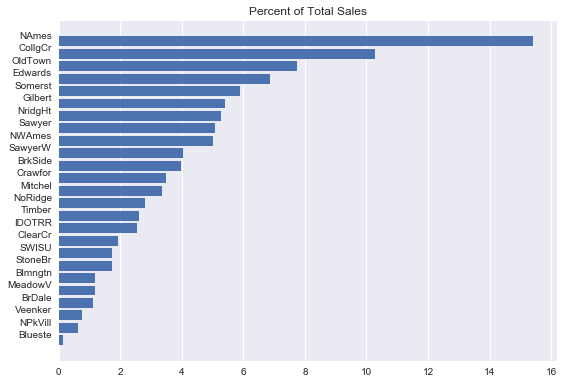

In [11]:
sns.set(font_scale=1)
ht = df.groupby(['Neighborhood'])['Neighborhood'].count()
ht.sort_values(inplace=True)
ht = pd.DataFrame(ht)
ht.columns=['count']
ht['count'] = (ht['count'] / sum(ht['count']))*100
ht.reset_index(inplace=True)
plt.barh(ht.index, ht['count'])
plt.yticks(ht.index + 0.5, ht['Neighborhood'])
plt.gca().yaxis.grid(False)
plt.title('Percent of Total Sales')
plt.tight_layout()
plt.show()

Its clear from this chart that NAmes: North Ames has had the highest percentage of sales of all the neighborhoods.  The Blueste: Bluestem neighborhood has the least amount of sales. 

Lets take a look at what the sales prices are telling us about the neighborhoods.

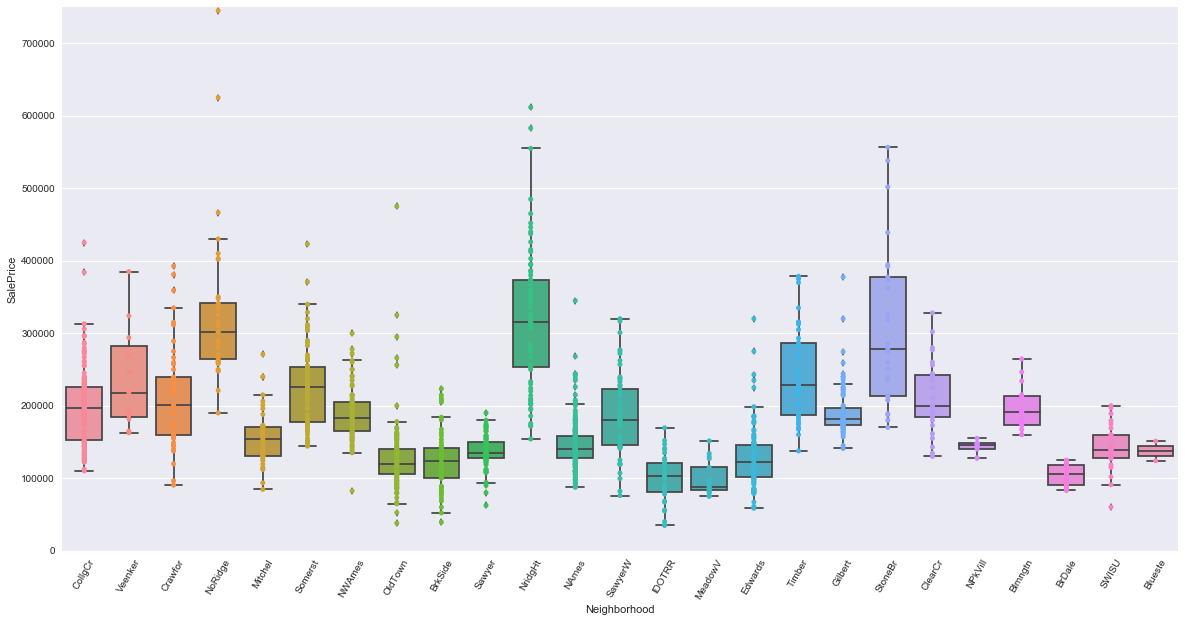

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
# sns.set(font_scale=10)
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
ax = sns.stripplot(x="Neighborhood", y="SalePrice", data=df, jitter=False, edgecolor="gray")
plt.ylim([0, 750000])
plt.xticks(rotation=60);

In [13]:
Price_sq_ft = df["SalePrice"].mean()/df["GrLivArea"].mean()
Price_sq_ft

119.38339140287546

From this we can tell that every nieghborhood has its outliers.  The most expensive neighborhoods are NoRidge, NRidgHT, and StoneBr.

# Mine and Refine Data

First I'm going to create dummy variables for the categorical data if it is warranted.

In [14]:
to_dummy =["Utilities","Neighborhood", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl"]

for x in to_dummy:
    print x
    print df[x].value_counts()
    print ""

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal       

I'm going to drop the Utilities column because there is not enough variablity in the options.  All of the homes seem to have the same price.

In [15]:
df.drop("Utilities", axis=1, inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.shape

(1460, 18)

In [17]:
to_dummy =["Neighborhood", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl"]

for x in to_dummy:
    #This will dummy all the variables and drop the original columns
    dumdf= pd.get_dummies(df[x], drop_first=True)
    df= pd.concat([df.drop(x, axis=1),dumdf], axis=1)

In [18]:
df.shape

(1460, 60)

In [19]:
#Moving the SalePrice column to the end of the Dataframe.
dfs=df[["SalePrice"]]
df=df.drop(["SalePrice"], axis=1)
df= pd.concat([df, dfs], axis=1)

Time to see how the original uncleaned data does in a simple Linear Regression model.

Rsq =  0.862511776921
CV =   0.756321069673
Mean Abs Error =  19167.0945279
Mean Sq Error =  867109155.936
Root Mean Sq Error =  29446.7172353


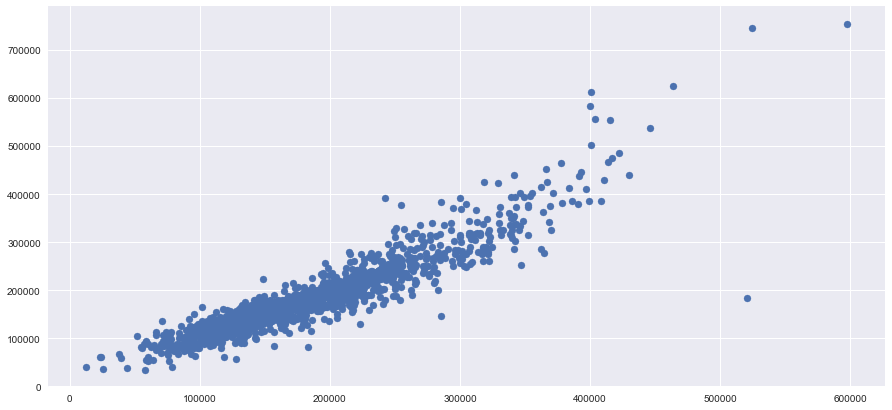

In [20]:
y=df["SalePrice"]
X=df.iloc[:,:59]

model=linear_model.LinearRegression()
model.fit(X,y)
predicted_y= model.predict(X)

r2score = r2_score(y, predicted_y)


fig = plt.figure(figsize=(15,7))
ax = plt.gca()
ax.scatter(predicted_y, y)
print "Rsq = ", r2score
print "CV =  ", cross_val_score(model, X, y, n_jobs=1, cv=5).mean()
print "Mean Abs Error = ", mean_absolute_error(y, predicted_y)
print "Mean Sq Error = ", mean_squared_error(y, predicted_y)
print 'Root Mean Sq Error = ', np.sqrt(mean_squared_error(y, predicted_y))

There are some clear outliers here.  The r squared is pretty high but I think with some cleaning I could do a bit better.

LotArea
Max =  215245
Min =  1300
Mean =  10516.8280822
STD =  9981.26493238


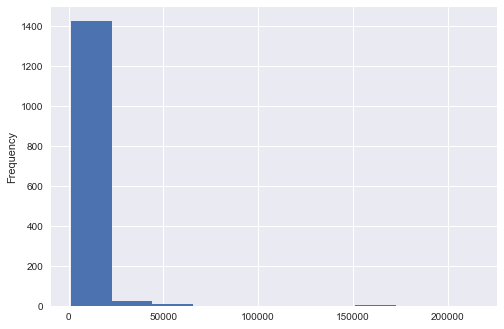

YearRemodAdd
Max =  2010
Min =  1950
Mean =  1984.86575342
STD =  20.6454068077


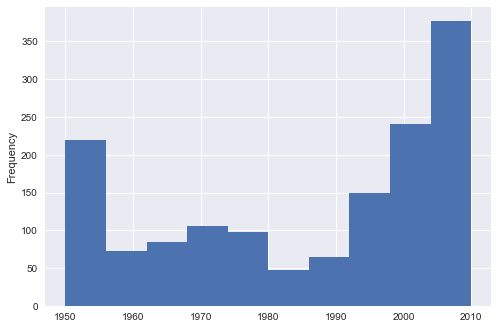

GrLivArea
Max =  5642
Min =  334
Mean =  1515.46369863
STD =  525.480383423


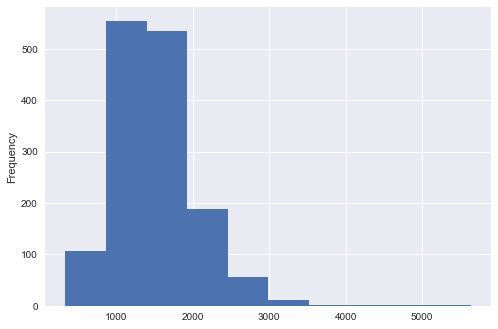

FullBath
Max =  3
Min =  0
Mean =  1.56506849315
STD =  0.550915801295


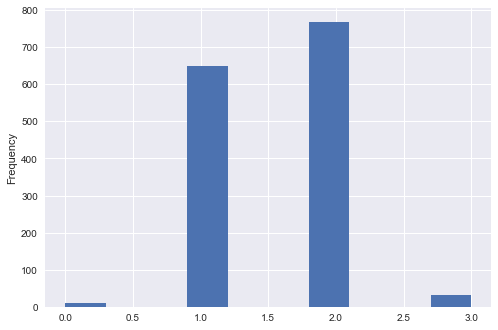

HalfBath
Max =  2
Min =  0
Mean =  0.382876712329
STD =  0.502885381093


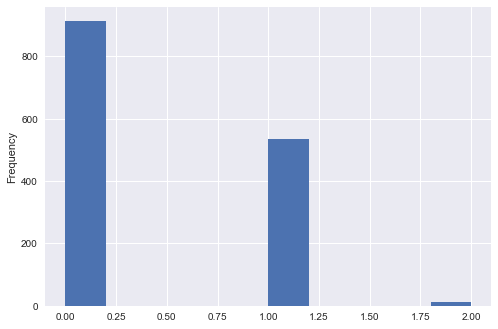

BedroomAbvGr
Max =  8
Min =  0
Mean =  2.86643835616
STD =  0.815778044144


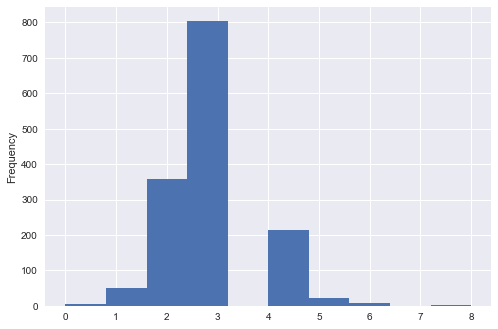

KitchenAbvGr
Max =  3
Min =  0
Mean =  1.04657534247
STD =  0.220338198384


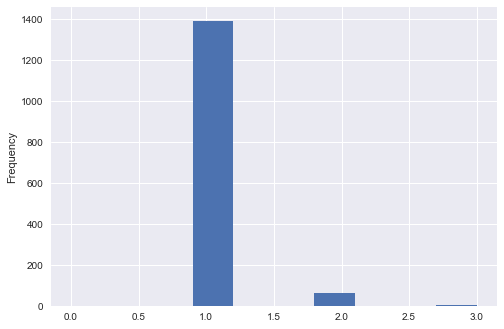

In [21]:
columns_to_examine = ["LotArea", "YearRemodAdd", "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr"]

for x in columns_to_examine:
    print x
    print "Max = ", df[x].max()
    print "Min = ", df[x].min()
    print "Mean = ", df[x].mean()
    print "STD = ", df[x].std()
    df[x].plot(kind="hist")
    plt.show()

#### Some Observations:
    Some of these distributions are not normal so I will start by removing the outliers that sit outside 3 standard deviations.
    
    The year built seems to skew to the left with a lot of the homes being built after 2000s. Over 26% of the houses in Ames, Iowa were built since 2000. There is quite a dip in construction in the early 1980s.
    
    The 1950s count of YearRemodAdd this sticks out but it woud have impacted all of Ames, Iowa so it wouldn't make sense to take it out at this point. Though I do worry about the fact that the dates default to construction date if there was no remodeling done.
    
    Houses without a bedroom or bathroom or kitchen I will remove because they simply aren't compareable.  I also think houses with 6+ bedrooms need to be removed.


In [22]:
df.shape

(1460, 60)

In [23]:
np.where(df['LotArea'] >= 40000)

(array([  53,  249,  313,  335,  384,  451,  457,  523,  661,  706,  769,
         848, 1298, 1396]),)

In [24]:
#Dropping large lot sizes because they aren't compareable.
df.drop(df.index[[53,  249,  313,  335,  384,  451,  457,  523,  661,  706,  769,
         848, 1298, 1396]], inplace=True)

In [25]:
#Dropping anything more than ~3 STDs from the mean.
np.where((df['GrLivArea'] > 3021))

(array([ 117,  184,  196,  302,  489,  600,  627,  682,  787, 1019, 1157,
        1161, 1170, 1256, 1340]),)

In [26]:
df.drop(df.index[[117,  184,  196,  302,  489,  600,  627,  682,  787, 1019, 1157,
        1161, 1170, 1256, 1340]], inplace=True)

In [27]:
np.where((df['FullBath'] < 1))

(array([ 185,  367,  584,  620,  895, 1141, 1188, 1244]),)

In [28]:
#If a home has no full bathroom it isn't liveable so I will be taking these out.
df.drop(df.index[[ 185,  367,  584,  620,  895, 1141, 1188, 1244]], inplace=True)

In [29]:
print np.where((df['BedroomAbvGr'] < 1))
print np.where((df['BedroomAbvGr'] >= 6))

(array([185]),)
(array([ 142,  285,  322,  555,  819,  872, 1315]),)


In [30]:
#I'm going to remove the two big outliers here.  Houses with no bedrooms because they aren't considered residential
#and houses with 6+ bedrooms because they are so rare as to not be useful for comparison.
df.drop(df.index[[185,  142,  285,  322,  555,  819,  872, 1315]], inplace=True)

In [31]:
print np.where((df['KitchenAbvGr'] < 1))
print np.where((df["KitchenAbvGr"] >= 3))

(array([921]),)
(array([ 48, 780]),)


In [32]:
#I'm going to remove the one house without a kitchen above grade and with 3 because they throw off a comparitive market
#analysis.
df.drop(df.index[[921, 48,780]], inplace=True)

In [33]:
print 'SalePrice'
print "Max = ", df['SalePrice'].max()
print "Min = ", df['SalePrice'].min()
print "Mean = ", df['SalePrice'].mean()
print "STD = ", df['SalePrice'].std()

SalePrice
Max =  611657
Min =  34900
Mean =  177948.218839
STD =  73174.1692242


In [34]:
np.where((df['SalePrice'] >= 400000))

(array([  56,  157,  174,  223,  269,  335,  373,  424,  455,  496,  507,
         570,  638,  773,  864, 1009, 1105, 1201, 1326]),)

In [35]:
np.where((df["SalePrice"] <= 50000))

(array([ 30, 477, 513, 932]),)

In [36]:
#I'm going to drop all rows with values above 400k because they seem like extreme examples of price being that
#they are more than 3 standard deviations from the mean.  I'm also going to remove houses with a valuation below
#because they are valued so low that they actually aren't useful for comparison.
df.drop(df.index[[56,  157,  174,  223,  269,  335,  373,  424,  455,  496,  507,
         570,  638,  773,  864, 1009, 1105, 1201, 1326, 30, 477, 513, 932]], inplace=True)

In [37]:
df.shape

(1389, 60)

In [38]:
Price_sq_ft = df["SalePrice"].mean()/df["GrLivArea"].mean()
Price_sq_ft

118.32979263310963

At this point I have dropped over 60 rows of data that included outliers. I want to see what doing this sifting has done to the effectiveness of the model.

## Build a Model

Rsq =  0.875466802426
CV =   0.858874506043
Mean Abs Error =  16374.395928
Mean Sq Error =  520464088.416
Root Mean Sq Error =  22813.6820442


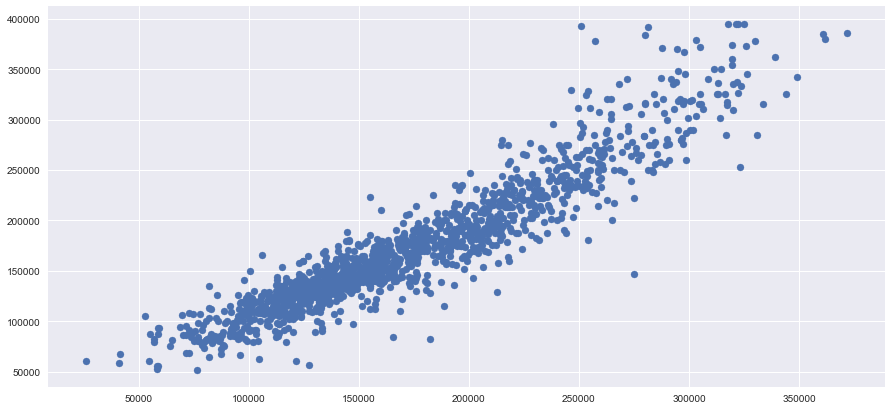

In [39]:
y=df["SalePrice"]
X=df.iloc[:,:59]

model=linear_model.LinearRegression()
model.fit(X,y)
predicted_y= model.predict(X)

r2score = r2_score(y, predicted_y)


fig = plt.figure(figsize=(15,7))
ax = plt.gca()
ax.scatter(predicted_y, y)
print "Rsq = ", r2score
print "CV =  ", cross_val_score(model, X, y, n_jobs=1, cv=5).mean()
print "Mean Abs Error = ", mean_absolute_error(y, predicted_y)
print "Mean Sq Error = ", mean_squared_error(y, predicted_y)
print 'Root Mean Sq Error = ', np.sqrt(mean_squared_error(y, predicted_y))

My Rsq has increased .015, CV increased .009, MAE decreased 2700, MSE decreased 345million, RMSE decreased 6,600.  Not bad.  But I think I can do a bit better.

In [40]:
y=df["SalePrice"]
X=df.iloc[:,:59]

X=sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        09:43:41   Log-Likelihood:                -15910.
No. Observations:                1389   AIC:                         3.194e+04
Df Residuals:                    1330   BIC:                         3.225e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const        -9.994e+05   8.55e+05     -1.168      0.243     -2.68e+06  6.79e+05
LotArea          1.3112      0.214      6.131      0.000         0.892     1.731
OverallQual   1.292e+04    874.589     14.772      0.000      1.12e+04  1.46e+04
OverallCond   6159.0442    735.458      8.374      0.000      4716.261  7601.828
YearBuilt      637.1664     55.502     11.480      0.000       528.285   746.048
YearRemodAdd   104.8064     47.188      2.221      0.027        12.235   197.377
GrLivArea       75.9179      3.059     24.815      0.000        69.916    81.920
FullBath      -624.9728   2148.264     -0.291      0.771     -4839.328  3589.382
HalfBath       671.2715   1998.300      0.336      0.737     -3248.892  4591.435
BedroomAbvGr -7486.9171   1244.682     -6.015      0.000     -9928.671 -5045.163
KitchenAbvGr -1.936e+04   6106.291     -3.171      0.002     -3.13e+04 -7383.327
MoSold         106.2894    240.795      0.441      0.659      -366.090   578.669
YrSold        -172.5839    484.778     -0.356      0.722     -1123.596   778.428
Blueste       1.007e+04   1.78e+04      0.565      0.572     -2.49e+04   4.5e+04
BrDale        1.293e+04   9383.560      1.378      0.168     -5475.862  3.13e+04
BrkSide       7601.8230   7932.113      0.958      0.338     -7958.994  2.32e+04
ClearCr       -241.8726   8909.570     -0.027      0.978     -1.77e+04  1.72e+04
CollgCr      -3641.8070   6767.464     -0.538      0.591     -1.69e+04  9634.261
Crawfor       2.238e+04   7736.052      2.893      0.004      7205.726  3.76e+04
Edwards      -5569.8548   7276.909     -0.765      0.444     -1.98e+04  8705.616
Gilbert      -1.192e+04   7224.002     -1.650      0.099     -2.61e+04  2251.441
IDOTRR       -1118.6254   8405.221     -0.133      0.894     -1.76e+04  1.54e+04
MeadowV       1.006e+04   8959.749      1.123      0.262     -7513.975  2.76e+04
Mitchel      -9770.6343   7474.279     -1.307      0.191     -2.44e+04  4892.027
NAmes        -5475.8963   7064.388     -0.775      0.438     -1.93e+04  8382.661
NPkVill       1.886e+04   1.01e+04      1.864      0.063      -988.195  3.87e+04
NWAmes       -1.466e+04   7237.460     -2.025      0.043     -2.89e+04  -460.035
NoRidge       2.212e+04   7812.951      2.832      0.005      6796.066  3.75e+04
NridgHt       4.003e+04   6905.621      5.797      0.000      2.65e+04  5.36e+04
OldTown      -6491.5371   7704.913     -0.843      0.400     -2.16e+04  8623.570
SWISU         1256.3245   8929.702      0.141      0.888     -1.63e+04  1.88e+04
Sawyer       -7532.4776   7444.506     -1.012      0.312     -2.21e+04  7071.776
SawyerW      -6608.7017   7174.129     -0.921      0.357     -2.07e+04  7465.140
Somerst       1.427e+04   6796.945      2.100      0.036       939.106  2.76e+04
StoneBr       4.419e+04   7993.263      5.528      0.000      2.85e+04  5.99e+04
Timbe

It is clear from some of the P values that they could be interpreted be induced by noise.  I don't want to remove any of the dummied categories because logically they seem to be important.  I will reduce the impact of the bathrooms columns by combining them. And then try to refine the SalePrice and LotArea columns to get a more normal distribution and see if that improves the model and minimizes the coefficients.

In [41]:
df["total_bath"]= df["FullBath"]+df["HalfBath"]
df= df.drop(["FullBath", "HalfBath"], axis=1)

In [42]:
df["LogLotArea"]= np.log(df["LotArea"])
df["LogSalePrice"]= np.log(df["SalePrice"])
df= df.drop(["LotArea", "SalePrice"], axis=1)

In [43]:
#Moving the SalePrice column to the end of the Dataframe.
dfs=df[["LogSalePrice"]]
df=df.drop(["LogSalePrice"], axis=1)
df= pd.concat([df, dfs], axis=1)

Rsq =  0.886249094292
CV =   0.871526644036
Mean Abs Error =  0.0892159018115
Mean Sq Error =  0.0148275564825
Root Mean Sq Error =  0.121768454382


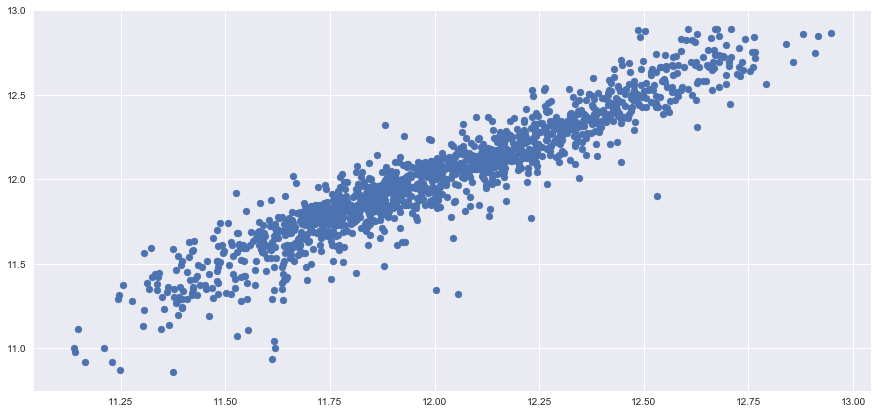

In [44]:
y=df["LogSalePrice"]
X=df.iloc[:,:58]

model1=linear_model.LinearRegression()
model1.fit(X,y)
predicted_y= model1.predict(X)

r2score = r2_score(y, predicted_y)


fig = plt.figure(figsize=(15,7))
ax = plt.gca()
ax.scatter(predicted_y, y)
print "Rsq = ", r2score
print "CV =  ", cross_val_score(model1, X, y, n_jobs=1, cv=5).mean()
print "Mean Abs Error = ", mean_absolute_error(y, predicted_y)
print "Mean Sq Error = ", mean_squared_error(y, predicted_y)
print 'Root Mean Sq Error = ', np.sqrt(mean_squared_error(y, predicted_y))

By making those adjustments my Rsq has increased .06, CV increased .006.  Because I logged the target variable the MAE, MSE, and RMSE all changed as well.

I'm going to try to do some feature impact shrinkage via a Lasso regression and see how it handles variable selection as well to build a hopefully slightly better model.

Rsq =  0.876222333242
CV =   0.869194350815
Mean Abs Error =  0.0927070968407
Mean Sq Error =  0.0161345558851
Root Mean Sq Error =  0.12702187168


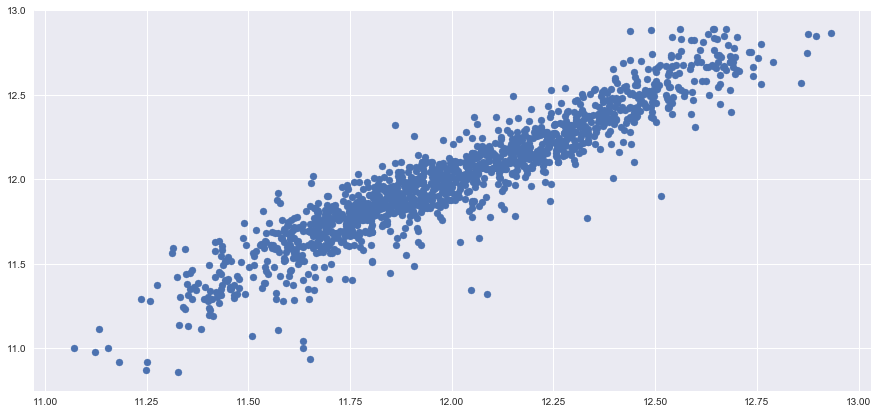

In [45]:
y=df["LogSalePrice"]
X=df.iloc[:,:58]

model=linear_model.LassoCV(alphas=(.001,.01,.25, .5,1,10))
model.fit(X,y)
predicted_y= model.predict(X)

r2score = r2_score(y, predicted_y)


fig = plt.figure(figsize=(15,7))
ax = plt.gca()
ax.scatter(predicted_y, y)
print "Rsq = ", r2score
print "CV =  ", cross_val_score(model, X, y, n_jobs=1, cv=5).mean()
print "Mean Abs Error = ", mean_absolute_error(y, predicted_y)
print "Mean Sq Error = ", mean_squared_error(y, predicted_y)
print 'Root Mean Sq Error = ', np.sqrt(mean_squared_error(y, predicted_y))

It didn't really help so I think the simple LinearRegression model is the best way to go to predict home prices, most likely because I have done both outlier reduction and ensured that the oddly distributed columns were normalized.

In [49]:
y=df["LogSalePrice"]
X=df.iloc[:,:58]
X=sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     181.9
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        09:43:43   Log-Likelihood:                 953.82
No. Observations:                1389   AIC:                            -1792.
Df Residuals:                    1331   BIC:                            -1488.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            6.5570      4.566      1.436      0.151        -2.400    15.514
OverallQual      0.0679      0.005     14.597      0.000         0.059     0.077
OverallCond      0.0515      0.004     13.139      0.000         0.044     0.059
YearBuilt        0.0040      0.000     13.503      0.000         0.003     0.005
YearRemodAdd     0.0006      0.000      2.437      0.015         0.000     0.001
GrLivArea        0.0004   1.62e-05     24.103      0.000         0.000     0.000
BedroomAbvGr    -0.0188      0.007     -2.851      0.004        -0.032    -0.006
KitchenAbvGr    -0.1275      0.032     -3.970      0.000        -0.190    -0.064
MoSold           0.0004      0.001      0.308      0.758        -0.002     0.003
YrSold          -0.0034      0.003     -1.297      0.195        -0.008     0.002
Blueste          0.0390      0.095      0.410      0.682        -0.148     0.225
BrDale          -0.0538      0.050     -1.084      0.279        -0.151     0.044
BrkSide         -0.0116      0.042     -0.274      0.784        -0.095     0.071
ClearCr          0.0061      0.048      0.127      0.899        -0.087     0.100
CollgCr         -0.0384      0.037     -1.052      0.293        -0.110     0.033
Crawfor          0.0976      0.041      2.352      0.019         0.016     0.179
Edwards         -0.1019      0.039     -2.608      0.009        -0.178    -0.025
Gilbert         -0.0777      0.039     -1.988      0.047        -0.154    -0.001
IDOTRR          -0.1105      0.045     -2.463      0.014        -0.199    -0.023
MeadowV         -0.1183      0.047     -2.491      0.013        -0.211    -0.025
Mitchel         -0.0685      0.040     -1.701      0.089        -0.148     0.011
NAmes           -0.0422      0.038     -1.116      0.264        -0.116     0.032
NPkVill          0.0444      0.054      0.822      0.411        -0.062     0.150
NWAmes          -0.0960      0.039     -2.455      0.014        -0.173    -0.019
NoRidge          0.0033      0.042      0.078      0.938        -0.079     0.086
NridgHt          0.0749      0.038      1.995      0.046         0.001     0.148
OldTown         -0.0849      0.041     -2.067      0.039        -0.166    -0.004
SWISU           -0.0203      0.048     -0.427      0.670        -0.114     0.073
Sawyer          -0.0659      0.040     -1.651      0.099        -0.144     0.012
SawyerW         -0.0704      0.039     -1.816      0.070        -0.146     0.006
Somerst          0.0344      0.037      0.941      0.347        -0.037     0.106
StoneBr          0.1182      0.043      2.755      0.006         0.034     0.202
Timber           0.0023      0.042      0.054      0.957        -0.079     0.084
Veenker          0.0360      0.053      0.681      0.496        -0.068     0.140
2fmCon           0.0349      0.030      1.156      0.248        -0.024     0.094
Duple

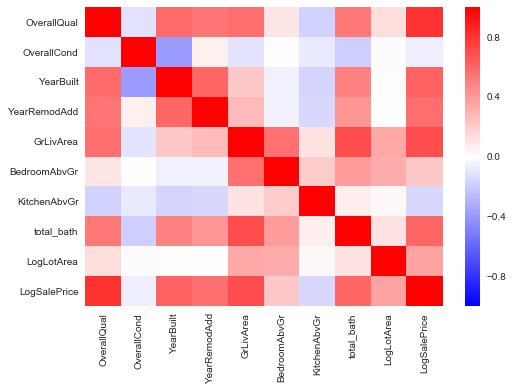

In [50]:
corr_df= df[["OverallQual", 'OverallCond', "YearBuilt", "YearRemodAdd", "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "total_bath", "LogLotArea", "LogSalePrice"]]

sns.heatmap(corr_df.corr(), cmap = 'bwr')
plt.show()

This chart nicely demonstrates feature correlation to sale price.  The darker red the box the more an increase in that feature increases the sales price.  We can see that overall quality rating of the materials used are more important than the overall condition (which is an odd divergence...must be a subjective assessment.  The Greater living area seems to be the most impactful on sales price.

I wouldn't call this a complete analysis of Real Estate in Ames, Iowa.  It is lacking more years of sales, and more features.  The data was a bit all over the place with some strange outliers.  Going forward I would reccomend creating an analysis based upon neighborhood grouping.  This would need to include removing any features that appear rarely in each neighborhood so that they do not pull the model in their direction by thier infrequency.  

Overall I am pleased with the increased efficacy of the prediction model after doing some data cleaning and refining.